# Metro Gold Line (804)

### Below we examine approximately 10 hours of data logged from the Metro Gold Line

The Metro API 'vehicles' endpoint for rail line 804 was polled every 3 minutes for 10 hours. Since GPS positions frequently take over 3 minutes to update (sometimes more, sometimes less), then we need to remove all duplicate entries in the data.



In [61]:
import pandas as pd
from datetime import datetime
from pytz import timezone

tracking_data = pd.read_csv('sample_tracking_data.csv')
tracking_data = tracking_data.drop(columns=['route_id'])

times = []
for index, row in tracking_data.iterrows():
    time = datetime.fromtimestamp(row.timestamp)
    time = time.replace(tzinfo=timezone('UTC'))
    time = time.astimezone(timezone('America/Los_Angeles'))
    formatted = time.strftime("%m/%d/%y, %I:%M:%S%P %Z")
    times.append(formatted)  
tracking_data['time'] = times

## Identify Duplicates

In [62]:
def show_all_dups(vehicle_id, df):
    print('VEHICLE: ' + str(vehicle_id))
    dups = df[df.duplicated(subset=['timestamp', 'lat', 'lon']) == True]
    print(dups[['time', 'lat', 'lon']])

def select_rows_by_value(df, col, val):
    return df[df[col] == val]

for vehicle_id in tracking_data.vehicle_id.unique():
    vehicle = select_rows_by_value(tracking_data, 'vehicle_id', vehicle_id)
    show_all_dups(vehicle_id, vehicle)
    print()

VEHICLE: 406
                         time        lat         lon
142  08/25/18, 05:29:06pm PDT  34.136919 -117.891003

VEHICLE: 401
Empty DataFrame
Columns: [time, lat, lon]
Index: []

VEHICLE: 411
Empty DataFrame
Columns: [time, lat, lon]
Index: []

VEHICLE: 407
                          time        lat         lon
203   08/25/18, 05:44:20pm PDT  34.136919 -117.891003
1028  08/25/18, 09:35:36pm PDT  34.033395 -118.154466

VEHICLE: 413
                          time        lat         lon
356   08/25/18, 06:23:43pm PDT  34.033395 -118.154466
1318  08/25/18, 11:40:54pm PDT  34.033395 -118.154466

VEHICLE: 404
                         time        lat         lon
300  08/25/18, 06:08:28pm PDT  34.033395 -118.154466
894  08/25/18, 08:47:10pm PDT  34.033395 -118.154466

VEHICLE: 412
Empty DataFrame
Columns: [time, lat, lon]
Index: []

VEHICLE: 402
                         time        lat         lon
161  08/25/18, 05:32:22pm PDT  34.033395 -118.154466
489  08/25/18, 06:57:36pm PDT  34.1369

## Geographic Distribution of GPS updates

This map shows the locations where GPS updates were recorded. The number of locations is less (by a lot) than the number of GPS polls, which strongly supports the theory that GPS positions are triggered as trains pass certain sections of track and are not on the trains themselves.

In [65]:
import folium
stops = pd.read_csv('stops.txt')

transmitters = tracking_data.groupby(by=['lon', 'lat']).size().rename('count').reset_index()
print('Number of GPS transmitter locations: ' + str(len(transmitters)))

map = folium.Map()

station_marker = folium.Icon(color='red', icon='fa-dot-circle')

locations = []
for index, row in transmitters.iterrows():
    count_label = 'Count: ' + str(int(row['count']))
    locations.append({'loc': [row.lat, row.lon], 'count': count_label})
    
for point in locations:
    marker = folium.Marker(location=point['loc'], popup=point['count'])
    marker.add_to(map)

map.fit_bounds([[33.907635, -118.480682], [34.169517, -118.019256]])
map

Number of GPS transmitter locations: 207


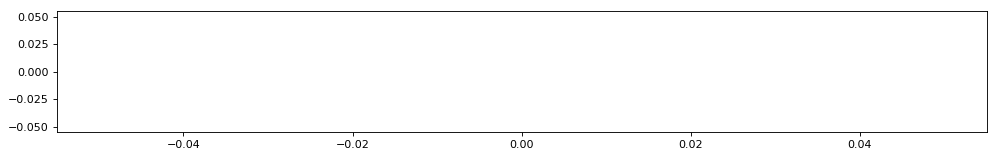

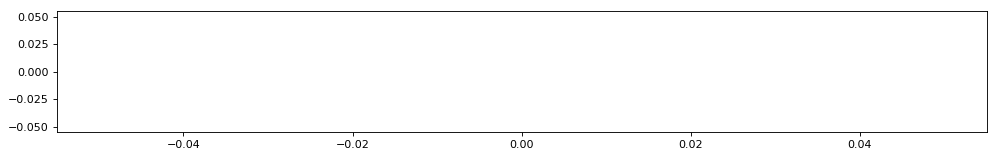

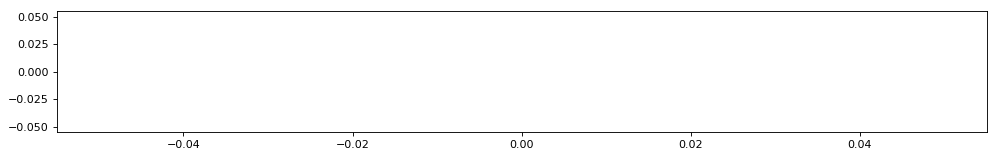

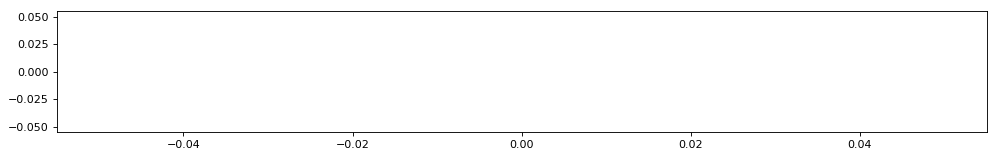

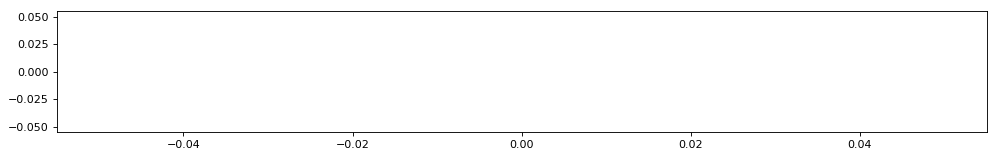

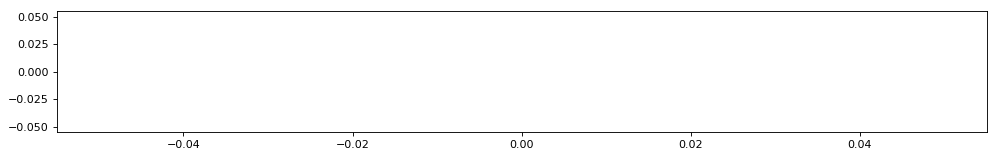

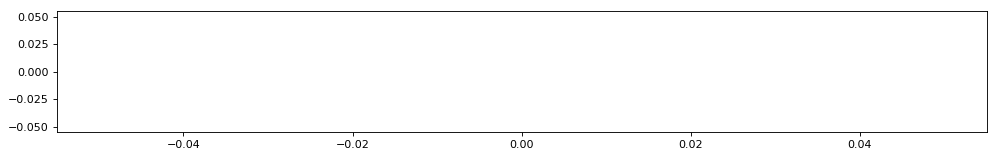

In [68]:
import matplotlib.pyplot as plt

for i in range(7):
    vehicle = 213 + i
    vehicleInfo = tracking_data.loc[tracking_data['vehicle_id'] == vehicle]
    plt.figure(num=None, figsize=(15, 2), dpi=80, facecolor='w', edgecolor='k')

    ar = vehicleInfo.timestamp
    plt.plot(ar, len(ar) * [1], 'x')
    plt.show()

    # This plot shows the distribution of GPS updates over time for each train. 
    # We need to do this with a larger sample size to understand whether or not GPS updates are regular
    # Perhaps somebody could calculate the average and std dev of time between GPS updates for all trains

In [ ]:
import folium
train_map = folium.Map()
vehicles = []
for train in trains.id:
    vehicles.append({'loc': [trains.lat[train - 1], trains.lon[train - 1]], 'label': 'Train'})
    
for point in vehicles:
    marker = folium.Marker(location=point['loc'], popup=point['label'])
    marker.add_to(train_map)

train_map

In [ ]:
import pandas as pd
#stops = pd.read_csv('stops.txt')
stop_times = pd.read_csv('stop_times.csv')
stop_ids = stop_times.stop_id.tolist()

line_ids = list(map(lambda x: str(x)[0:3], stop_ids))
station_ids = list(map(lambda x: str(x)[3:5], stop_ids))

line_id = pd.DataFrame({"line_id": line_ids})
station_id = pd.DataFrame({"station_id": station_ids})

df = pd.concat([stop_times, line_id], axis=1)
df = pd.concat([df, station_id], axis=1)
print(df[['trip_id', 'arrival_time', 'stop_id', 'line_id', 'station_id']].head())
    

In [ ]:
stops = pd.read_csv('stops.txt')
#print(stops[['stop_id', 'stop_lat', 'stop_lon']].head())
df['stop_id'] = df['stop_id'].apply(str)
merged = df.merge(stops, how = 'inner', on = 'stop_id')
print(merged[['line_id', 'station_id', 'arrival_time', 'stop_lat', 'stop_lon']][0:100])

# This collects latitudes and longitudes of every point along the train schedule

In [ ]:
print(stops.loc[stops['stop_name'] == 'Little Tokyo / Arts District Station'])